In [5]:
import pandas as pd

data = pd.read_csv("manufacturing_process.csv")

In [6]:
import numpy as np

# calculate the end time of each step
data["end_time"] = data["start_time"] + data["duration"] * 60

# calculate the time each step takes to complete
data["completion_time"] = np.nan
data.loc[0, "completion_time"] = data.loc[0, "end_time"]
for i in range(1, len(data)):
    data.loc[i, "completion_time"] = max(data.loc[i, "end_time"], data.loc[i-1, "completion_time"])

# calculate the time each step spends waiting
data["waiting_time"] = data["completion_time"] - data["end_time"]

# calculate the total time spent waiting for each step
waiting_time_per_step = data.groupby("step")["waiting_time"].sum()

# find the step with the longest total waiting time
bottleneck = waiting_time_per_step.idxmax()

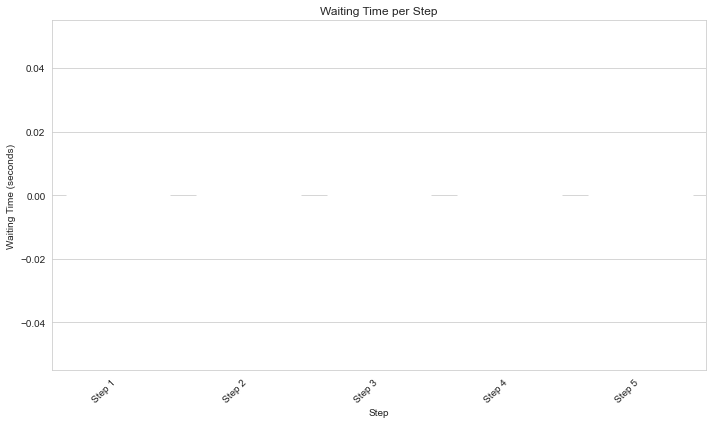

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x="step", y="waiting_time", data=data)
plt.title("Waiting Time per Step")
plt.xlabel("Step")
plt.ylabel("Waiting Time (seconds)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()